<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-for-talk" data-toc-modified-id="Plot-for-talk-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot for talk</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
c14_atm_data = pd.read_excel('../../data/14C_levin_data_until_2016_for_plotting.xlsx', names=['year', 'd14C'])

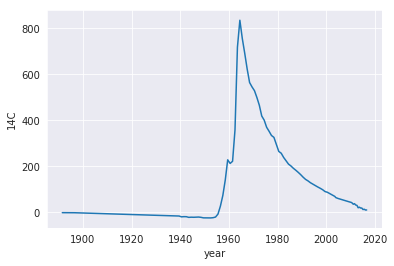

In [3]:
fig = plt.figure()
plt.plot(c14_atm_data['year'], c14_atm_data['d14C'])
plt.xlabel('year')
plt.ylabel('14C')
plt.show()

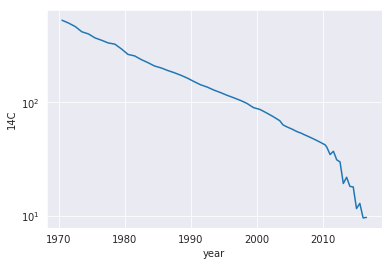

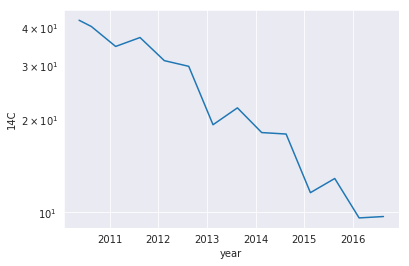

In [4]:
for t in [1970, 2010]:
    late_data = c14_atm_data.query('year > @t')
    fig = plt.figure()
    plt.plot(late_data['year'], late_data['d14C'])
    plt.xlabel('year')
    plt.ylabel('14C')
    plt.semilogy()
    plt.show()

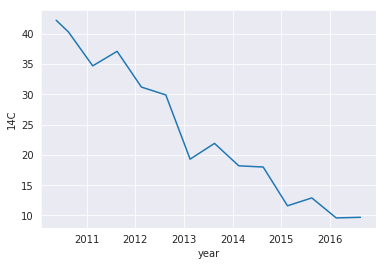

In [5]:
late_data = c14_atm_data.query('year > 2010')
fig = plt.figure()
plt.plot(late_data['year'], late_data['d14C'])
plt.xlabel('year')
plt.ylabel('14C')
#plt.semilogy()
plt.show()

In [6]:
def f1(x, m, n):
    return m*x + n

def f2(x, a, b, c):
    return a * np.exp(-b * (x-c))

def fit(f, p0=None):
    p = sp.optimize.curve_fit(f, late_data['year'], late_data['d14C'], p0)[0]
    return lambda x: f(x, *p)

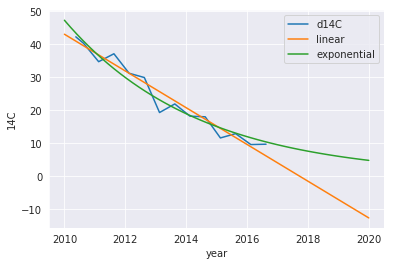

In [7]:
late_data = c14_atm_data.query('year > 2010')
fig = plt.figure()
plt.plot(late_data['year'], late_data['d14C'])
t = np.linspace(2010, 2020)
plt.plot(t, fit(f1)(t), label='linear')
plt.plot(t, fit(f2, [1, 1, 2010])(t), label='exponential')
plt.xlabel('year')
plt.ylabel('14C')
plt.legend()
# plt.semilogy()
plt.show()

In [8]:
c14_atm_data.tail()

,year,d14C
137,2014.626,18.0
138,2015.125,11.6
139,2015.625,12.9
140,2016.125,9.6
141,2016.625,9.7


# Plot for talk

In [11]:
c14_atm_data = pd.read_excel('../../data/14C_levin_data_until_2016_for_plotting.xlsx', names=['year', 'd14C'])

late_data = c14_atm_data.query('year > 2010')

def f2(x, a, b, c):
    return a * np.exp(-b * (x-c))

def fit(f, p0=None):
    p = sp.optimize.curve_fit(f, late_data['year'], late_data['d14C'], p0)[0]
    return lambda x: f(x, *p)

tt = np.arange(c14_atm_data['year'].max() + 0.5, 2020, 0.5)
cc = fit(f2, [1, 1, 2010])(tt)

j = c14_atm_data.index.max()
for i in np.arange(0, len(tt)-0.5, 1).astype(int):
    c14_atm_data.loc[j+i+1, 'year'] = tt[i]
    c14_atm_data.loc[j+i+1, 'd14C'] = cc[i]

In [12]:
sns.set_context('talk')

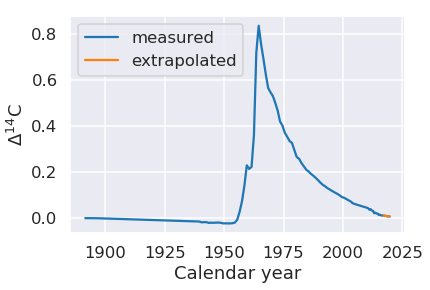

In [14]:
fig = plt.figure()
plt.plot(c14_atm_data['year'], c14_atm_data['d14C']/1000, label='measured')
plt.plot(tt, cc/1000, label='extrapolated')

plt.xlabel('Calendar year')
plt.ylabel('$\Delta^{14}$C')

plt.legend()

# plt.savefig('plots/atm_14C_extrapolate.svg', bbox_inches='tight')

plt.show()